In [1]:
import pandas as pd
from sklearn import linear_model, model_selection, pipeline, preprocessing, metrics, ensemble
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset
df = pd.read_csv("credit_card_fraud_dataset.csv")
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [3]:
#Converting TransactionDate to Datetime
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

#Adding Columns to make Datetime usable for machine learning
df["year"] = df["TransactionDate"].dt.year
df["month"] = df["TransactionDate"].dt.month
df["day"] = df["TransactionDate"].dt.day
df["hour"] = df["TransactionDate"].dt.hour
df["minute"] = df["TransactionDate"].dt.minute
df["second"] = df["TransactionDate"].dt.second

In [4]:
#Convert Transaction Type to int
label_encoder = LabelEncoder()
df['TransactionType_encoded'] = label_encoder.fit_transform(df['TransactionType'])

In [5]:
#Convert Location to ints
df['Location_encoded'] = label_encoder.fit_transform(df['Location'])

In [6]:
df.columns

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'TransactionType_encoded',
       'Location_encoded'],
      dtype='object')

In [7]:
#Filtering Dataset to include only wanted columns
df = df[['TransactionID', 'TransactionDate','year', 'month', 'day',
       'hour', 'minute', 'second', 'Amount', 'MerchantID',
       'TransactionType_encoded', 'Location_encoded', 'IsFraud']]

In [8]:
#Downsize the dataset
df_1 = df[df["IsFraud"] == 1]
df_2 = df[df["IsFraud"] == 0]
df_2 = df_2.sample(5000)
df = pd.concat([df_1, df_2])

In [9]:
#Finalized dataframe
df

,TransactionID,TransactionDate,year,month,day,hour,minute,second,Amount,MerchantID,TransactionType_encoded,Location_encoded,IsFraud
190,191,2024-09-07 18:24:35.463748,2024,9,7,18,24,35,1703.80,916,0,9,1
191,192,2024-04-27 01:48:35.463751,2024,4,27,1,48,35,4248.10,862,0,9,1
208,209,2023-11-05 01:05:35.463826,2023,11,5,1,5,35,1641.32,826,0,9,1
319,320,2024-06-16 18:30:35.464289,2024,6,16,18,30,35,281.18,237,0,5,1
370,371,2023-10-29 04:09:35.464522,2023,10,29,4,9,35,3047.66,789,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44987,44988,2024-09-06 20:31:35.718122,2024,9,6,20,31,35,490.56,411,1,1,0
11175,11176,2023-12-02 01:02:35.520609,2023,12,2,1,2,35,2772.14,642,0,4,0
68828,68829,2024-03-27 11:27:35.871316,2024,3,27,11,27,35,490.86,673,0,1,0
19734,19735,2024-05-18 02:33:35.557801,2024,5,18,2,33,35,914.65,56,1,5,0


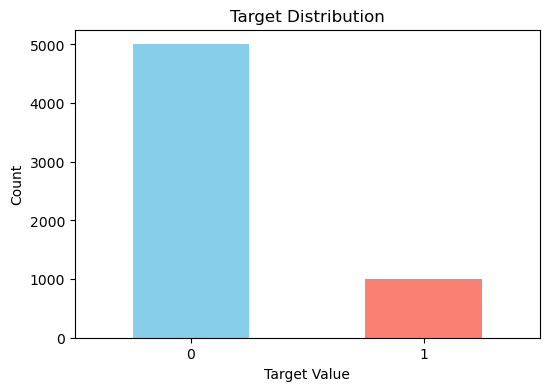

In [10]:
fraud_count = df['IsFraud'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
fraud_count.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.show()

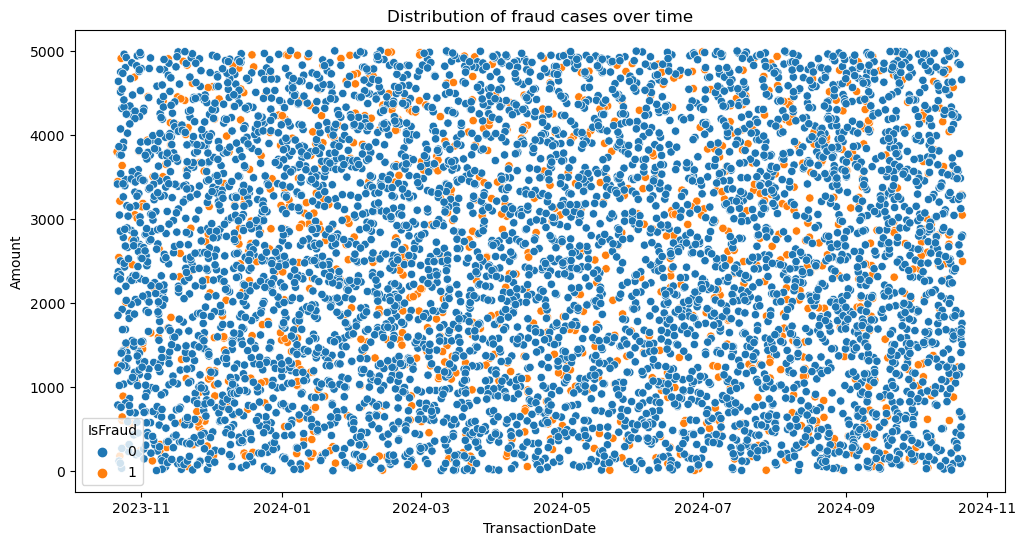

In [11]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=df, x='TransactionDate', y='Amount', hue='IsFraud')

plt.title('Distribution of fraud cases over time')
plt.show()

In [12]:
#Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report, cohen_kappa_score
from sklearn import preprocessing

X = df.drop(["TransactionID", "TransactionDate", "IsFraud"], axis=1)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

y = df["IsFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(penalty='l1', solver='liblinear', C=0.01) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Kappa": cohen_kappa_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred)
}

print("Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

    


Metrics:
Accuracy: 0.8208
Precision: 0.0000
Recall: 0.0000
Kappa: 0.0000
f1: 0.0000


C:\Users\fjeld\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
feature_names = df.drop(["TransactionID", "TransactionDate", "IsFraud"], axis=1).columns
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})

# Sort and display all features
sorted_features = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
print("\nFeature Importance:")
print(sorted_features.to_string())


Feature Importance:
                   Feature  Coefficient
0                     year          0.0
1                    month          0.0
2                      day          0.0
3                     hour          0.0
4                   minute          0.0
5                   second          0.0
6                   Amount          0.0
7               MerchantID          0.0
8  TransactionType_encoded          0.0
9         Location_encoded          0.0


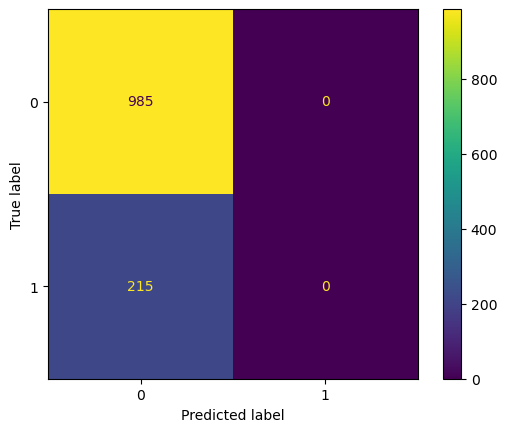

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your true labels (y_true) and predicted labels (y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Prepare the data
X = df.drop(["TransactionID", "TransactionDate", "IsFraud"], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df["IsFraud"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train K-means model
n_clusters = 15  # Since we have binary classification (fraud vs non-fraud)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X_train)

# Get predictions
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Map clusters to fraud labels
# We assume the cluster with higher average fraud rate represents fraudulent transactions
train_fraud_rates = []
for cluster in range(n_clusters):
    cluster_fraud_rate = np.mean(y_train[train_clusters == cluster])
    train_fraud_rates.append(cluster_fraud_rate)

fraud_cluster = np.argmax(train_fraud_rates)
y_pred = (test_clusters == fraud_cluster).astype(int)

# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Kappa": cohen_kappa_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred),
    "Silhouette Score": silhouette_score(X_test, test_clusters)
}

print("Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Metrics:
Accuracy: 0.7375
Precision: 0.1667
Recall: 0.1163
Kappa: -0.0120
f1: 0.1370
Silhouette Score: 0.1004


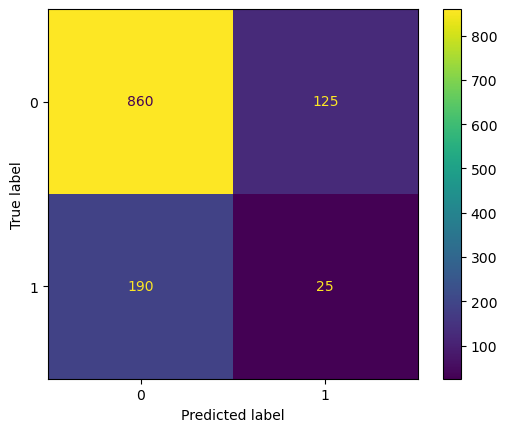

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your true labels (y_true) and predicted labels (y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Metrics:
Accuracy: 0.6783
Precision: 0.1504
Recall: 0.2000
Kappa: -0.0230
f1: 0.1717

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.15      0.20      0.17       200

    accuracy                           0.68      1200
   macro avg       0.49      0.49      0.49      1200
weighted avg       0.72      0.68      0.70      1200



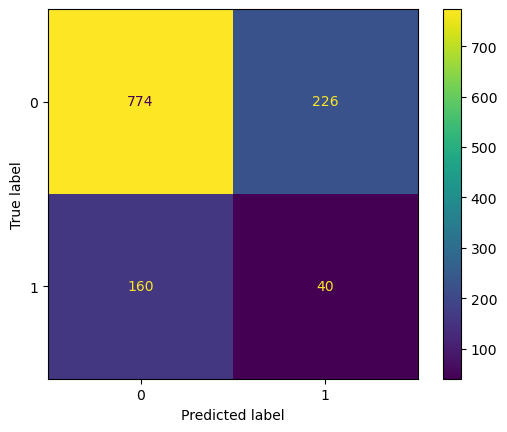

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, cohen_kappa_score


# Drop unnecessary columns
columns_to_drop = ['TransactionID', 'TransactionDate']
data_cleaned = df.drop(columns=columns_to_drop)

# Separate features and target variable
X = data_cleaned.drop('IsFraud', axis=1)
y = data_cleaned['IsFraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced", min_samples_leaf=50, max_depth = 25)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Kappa": cohen_kappa_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred)
}

print("Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm_1 = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp_1.plot()
plt.show()

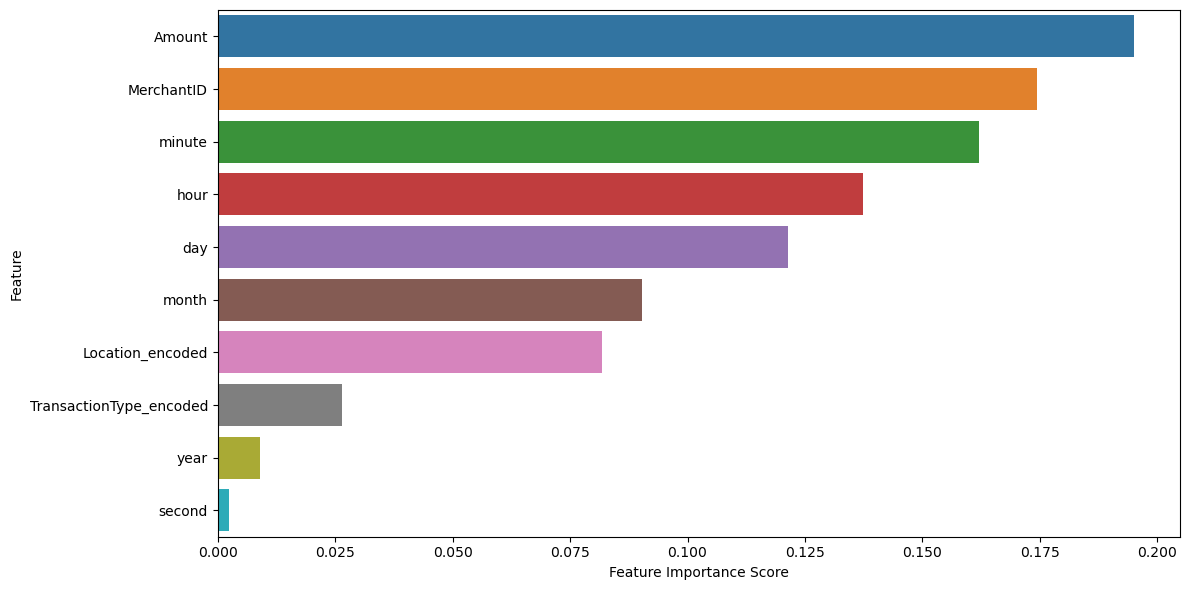


Top 10 Features by Importance:
                Feature  Importance
                 Amount    0.195079
             MerchantID    0.174336
                 minute    0.161955
                   hour    0.137261
                    day    0.121489
                  month    0.090285
       Location_encoded    0.081828
TransactionType_encoded    0.026462
                   year    0.008993
                 second    0.002312


In [18]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

# Print top 10 features with importance scores
print("\nTop 10 Features by Importance:")
print(importance_df.head(10).to_string(index=False))